In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier


In [16]:
data=pd.read_excel('Bank_Personal_Loan_Modelling-1.xlsx',sheet_name='Data')

In [17]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# EDA

In [18]:
data.ID.count()

5000

In [19]:
data.drop(columns='ID',axis=1,inplace=True)

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [22]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

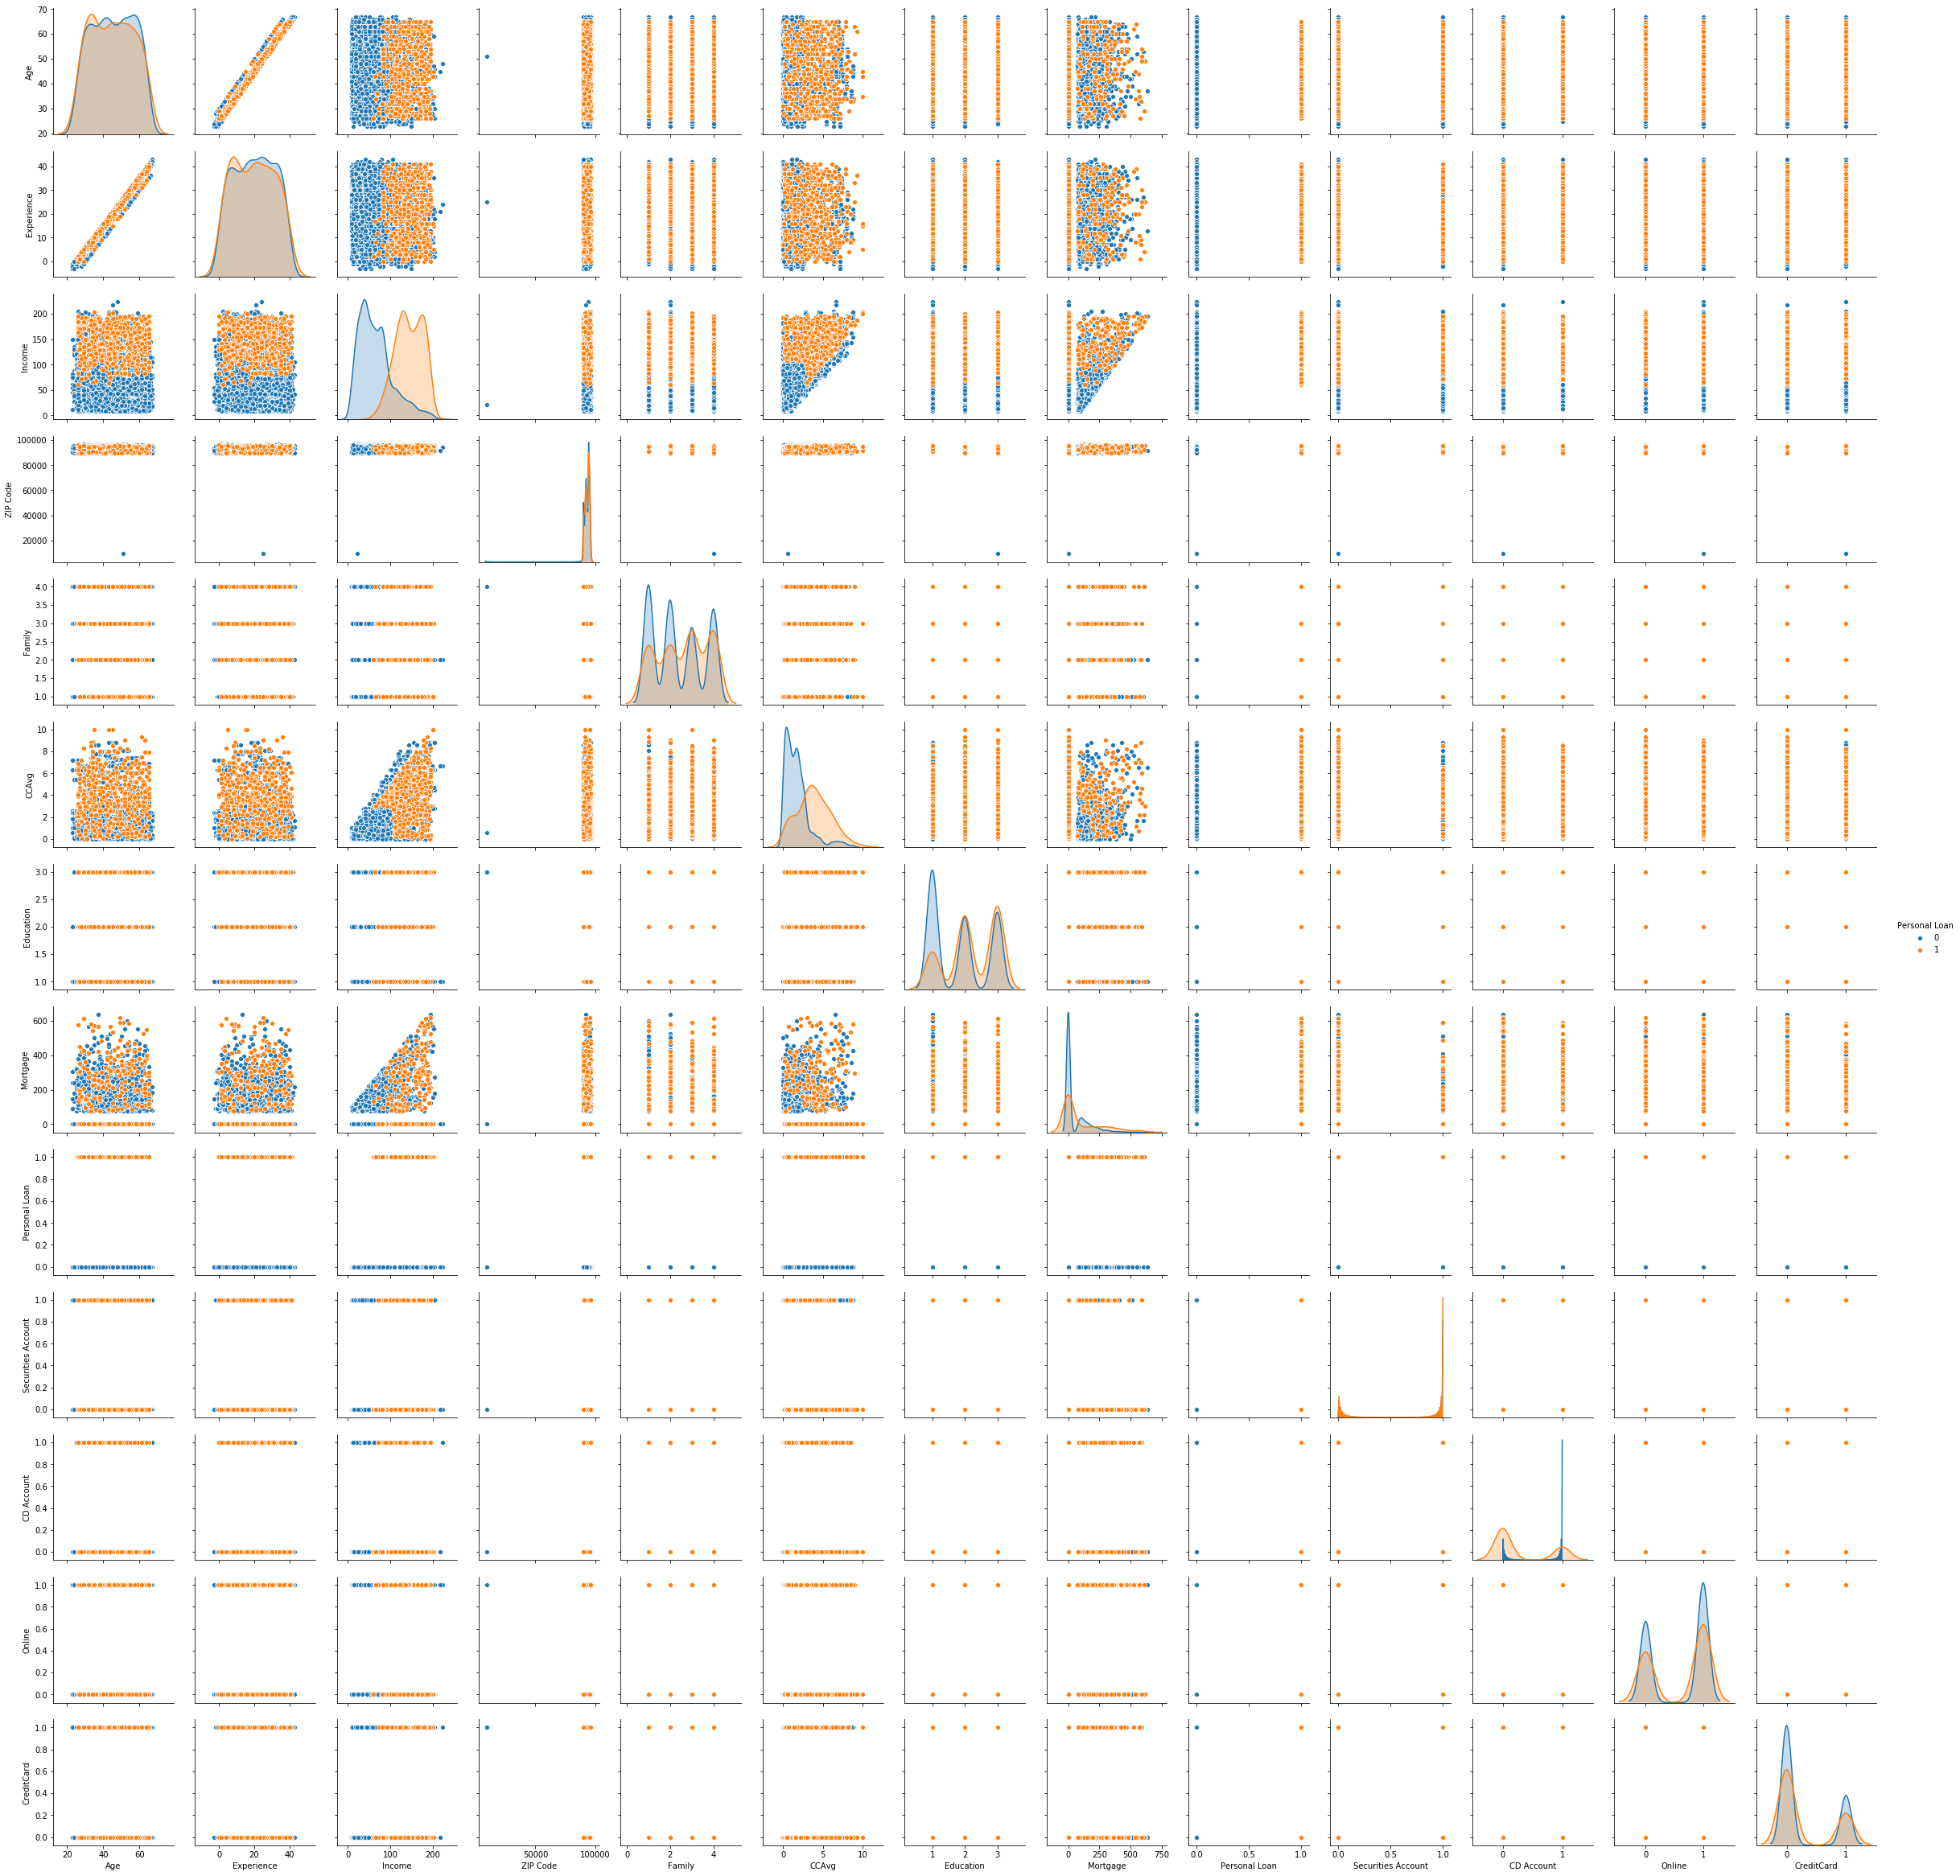

In [23]:
sns.pairplot(data,diag_kind='kde',hue='Personal Loan')
plt.show()

In [24]:
data['Personal Loan'].value_counts()/5000*100  # target varaible has only 2 values but has imbalanced data

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

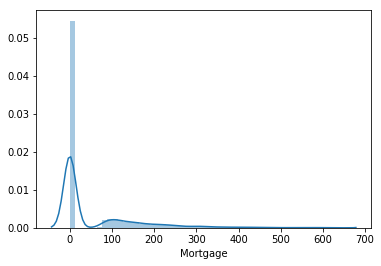

In [25]:
sns.distplot(data.Mortgage,kde=True)

In [26]:
# Most of the sample population doesn't have mortage

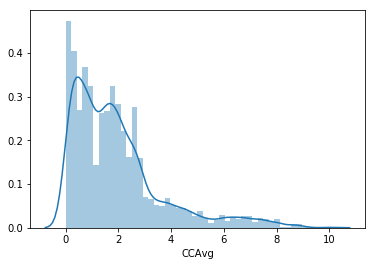

In [27]:
sns.distplot(data.CCAvg,kde=True
            )

In [28]:
# CCAvg is Right Skewed.Most of the population have less spending on credit cards

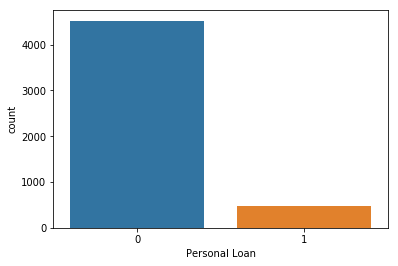

In [29]:
sns.countplot(data['Personal Loan'])

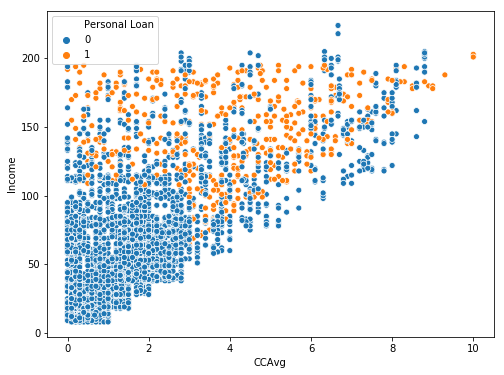

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.CCAvg,data.Income,hue='Personal Loan',data=data)   # 1 is taken loan and 0 is no Loan
plt.show()

In [31]:
# most of the low income earning and low credit expenditure people have not taken loan

In [32]:
data.groupby('Personal Loan').count()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


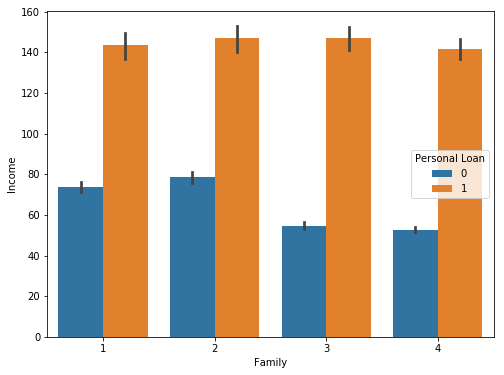

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x='Family',y='Income',hue='Personal Loan',data=data)
plt.show()

In [34]:
data['CreditCard'].value_counts()  

0    3530
1    1470
Name: CreditCard, dtype: int64

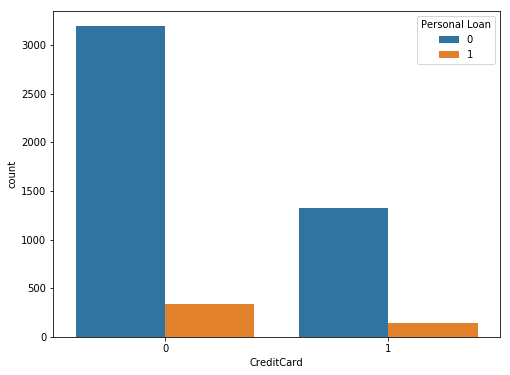

In [35]:

plt.figure(figsize=(8,6))
sns.countplot(x='CreditCard',hue='Personal Loan',data=data)
plt.show()

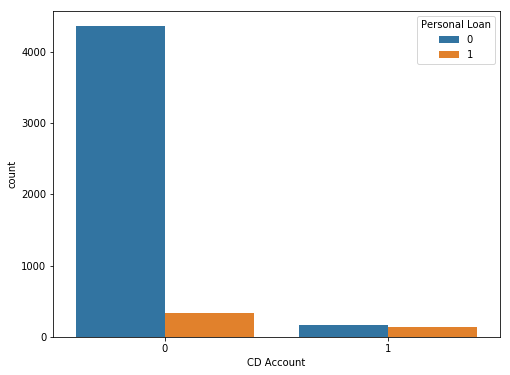

In [36]:

plt.figure(figsize=(8,6))
sns.countplot(x='CD Account',hue='Personal Loan',data=data)
plt.show()

In [37]:
# Those who have a CD account has higher probability 

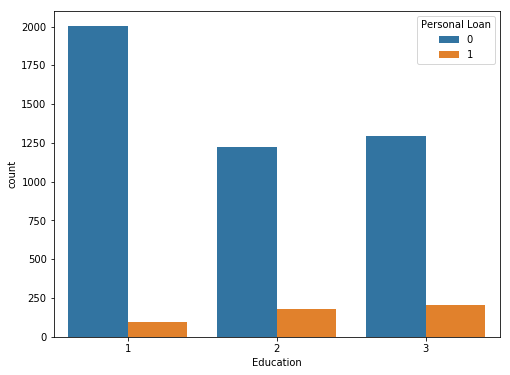

In [38]:

plt.figure(figsize=(8,6))
sns.countplot(x='Education',hue='Personal Loan',data=data)
plt.show()

In [39]:
# Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
# undergrad people has a low probability of taking loans compared to others

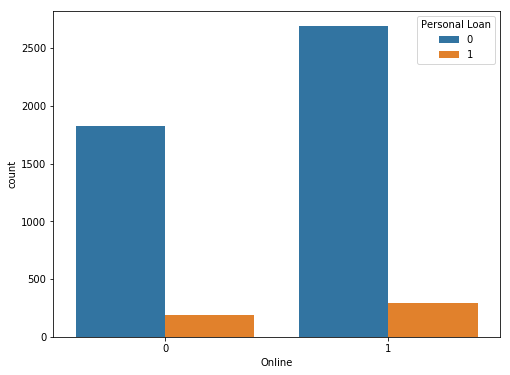

In [40]:

plt.figure(figsize=(8,6))
sns.countplot(x='Online',hue='Personal Loan',data=data)
plt.show()


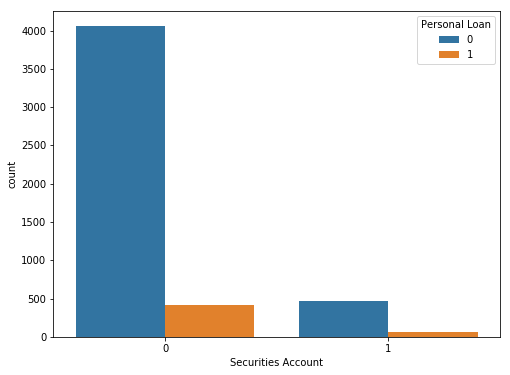

In [41]:

plt.figure(figsize=(8,6))
sns.countplot(x='Securities Account',hue='Personal Loan',data=data)
plt.show()


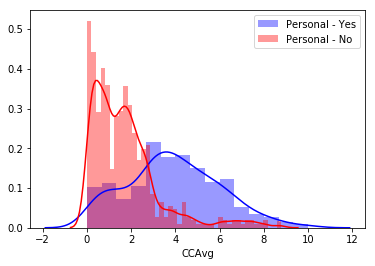

In [42]:
sns.distplot(data[data['Personal Loan']==1].CCAvg,color='b', label='Personal - Yes')
sns.distplot(data[data['Personal Loan']==0].CCAvg,color='r',label='Personal - No')
plt.legend()

# Feature Engineering

In [43]:
data[data['Experience']<0].count()

Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [44]:

data.Experience=np.abs(data.Experience)       # Experience has some negative values which , replace them with absolute values

In [45]:
data[data['Experience']<0].count()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [46]:
data['ZIP Code'].nunique()

467

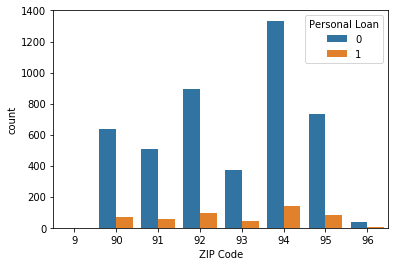

In [47]:
zipc=data['ZIP Code']//1000
sns.countplot(zipc,hue='Personal Loan',data=data)

In [48]:


g=data.groupby(['Family','Personal Loan'])['Family'].count()
g

Family  Personal Loan
1       0                1365
        1                 107
2       0                1190
        1                 106
3       0                 877
        1                 133
4       0                1088
        1                 134
Name: Family, dtype: int64

In [49]:
for i in range(1,5):
    print(g.loc[i,1]/(g.loc[i,0]+g.loc[i,1]))   # there is no significant difference in perecentage of loan taking based on family size

0.07269021739130435
0.08179012345679013
0.1316831683168317
0.10965630114566285


In [50]:
# Zip code is a categorical variable but it does not make any numerical sense and as per our observation it has 467 unique rows, so we will not use  the column during modeling

In [51]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
y=data.iloc[:,8]
x=data.drop(columns=['Personal Loan','ZIP Code','Age','Experience','Mortgage'],axis=1)

In [54]:
col=x.columns
s=StandardScaler()
x=pd.DataFrame(s.fit_transform(x))
x.columns=col

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lg=LogisticRegression()

In [58]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
lg.score(x_test,y_test)

0.9504

In [60]:
lg.score(x_train,y_train)

0.9512

In [61]:
from statsmodels.api import add_constant
import statsmodels.discrete.discrete_model as sm
X2 = add_constant(x_train)

logit=sm.Logit(y_train,X2)

In [62]:

result=logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.124537
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3741
Method:                           MLE   Df Model:                            8
Date:                Sat, 09 Feb 2019   Pseudo R-squ.:                  0.5993
Time:                        11:39:16   Log-Likelihood:                -467.01
converged:                       True   LL-Null:                       -1165.5
                                        LLR p-value:                2.664e-296
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.8021      0.195    -24.601      0.000      -5.185      -4.420
Incom

In [63]:
data=pd.concat([x,y],axis=1)

from sklearn.utils import resample
import numpy as np

values = data.values
n_iterations = 100              
n_size = int(len(values) *  0.5)
stats = list()

for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = LogisticRegression()
    model.fit(train[:,:-1], train[:,-1])
    score = model.score(test[:,:-1], test[:,-1])  
    print(score)
    stats.append(score)


0.9507355456722545
0.9458709229701596
0.9539091840218504
0.9479347448802499
0.9470426409903714
0.952233676975945
0.9467902506007553
0.9482344874871443
0.9501557632398754
0.95249653259362


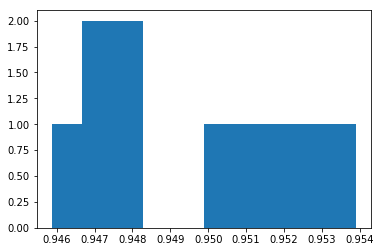

95.0 confidence interval 94.6% and 95.4%


In [64]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
from sklearn.utils import resample
import numpy as np

values = data.values
n_iterations = 100              
n_size = int(len(values) *  0.5)
stats = list()

for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = GaussianNB( )
    model.fit(train[:,:-1], train[:,-1])
    score = model.score(test[:,:-1], test[:,-1])  
    print(score)
    stats.append(score)


0.9051246537396122
0.8841632088520055
0.8892339544513458
0.8854094975911906
0.89275956284153
0.8840377226685295
0.8893026404874746
0.8822107081174438
0.888965755793843
0.8806484994825802


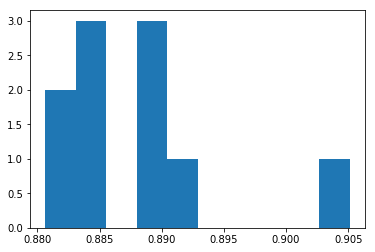

95.0 confidence interval 88.1% and 90.2%


In [90]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
from sklearn.tree import DecisionTreeClassifier
rfcl = DecisionTreeClassifier(random_state=50)

In [82]:
clf = DecisionTreeClassifier()

param_dist = {"max_depth": range(1,20),
              "criterion": ["gini", "entropy"]}

samples = 10 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) 

randomCV.fit(x_train, y_train)

print(randomCV.best_params_)

{'max_depth': 4, 'criterion': 'entropy'}


In [85]:
from sklearn.utils import resample
import numpy as np

values = data.values
n_iterations = 100              
n_size = int(len(values) *  0.5)
stats = list()

for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = DecisionTreeClassifier( max_depth = 4, criterion = 'entropy')
    model.fit(train[:,:-1], train[:,-1])
    score = model.score(test[:,:-1], test[:,-1])  
    print(score)
    stats.append(score)


0.984552008238929
0.9830859509837763
0.9782983120909404
0.9818430969510106
0.9822299651567944
0.9787899860917941
0.9840940525587828
0.9824802473376847
0.9805825242718447
0.9855322080606269


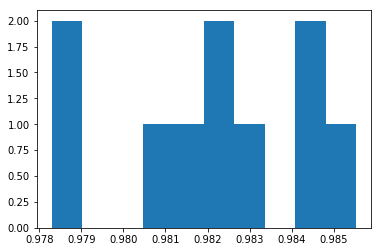

95.0 confidence interval 97.8% and 98.5%


In [86]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Decision Tree is the best model because it gives the best accuracy i.e 97.8% to 98.5%

In [71]:
# Ensemble Techniques
# Random Forest

clf = RandomForestClassifier(n_estimators=50)

param_dist = {"max_depth": range(1,20),
              "criterion": ["gini", "entropy"]}

samples = 10 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) 

randomCV.fit(x_train, y_train)

print(randomCV.best_params_)

{'max_depth': 8, 'criterion': 'entropy'}


In [100]:
data=pd.concat([x,y],axis=1)

from sklearn.utils import resample
import numpy as np

values = data.values
n_iterations = 100              
n_size = int(len(values) *  0.5)
stats = list()

for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = RandomForestClassifier( max_depth = 8, criterion = 'entropy', n_estimators=50)
    model.fit(train[:,:-1], train[:,-1])
    score = model.score(test[:,:-1], test[:,-1])  
    print(score)
    stats.append(score)

0.9826689774696707
0.9847381200138744
0.9831209094040647
0.9797250859106529
0.9833795013850416
0.9836748871135811
0.9861973775017253
0.9803380476026216
0.9819819819819819
0.9817931982136723
0.981811942347289
0.9813600276147739
0.983402489626556
0.9826294277929155
0.9852233676975946
0.9795221843003413
0.9824922760041195
0.9846153846153847
0.9875776397515528
0.9845307665864558
0.9807890222984562
0.9790867898222377
0.9835390946502057
0.9840665050225147
0.981263011797363
0.9832421340629275
0.9852739726027397
0.9846625766871165
0.9802152030544949
0.9818493150684932
0.9820069204152249
0.981263011797363
0.9832593098735907
0.9838042729152309
0.9865098581805604
0.984472049689441
0.983826565726084
0.9823223570190641
0.9820813232253618
0.9834368530020704
0.9846730245231607
0.9832635983263598
0.9850340136054422
0.9788854274835583
0.9873374401095141
0.9852991452991453
0.983451536643026
0.9817493112947658
0.9875690607734806
0.9861878453038674
0.9860675722744688
0.9813471502590674
0.9869370917841183


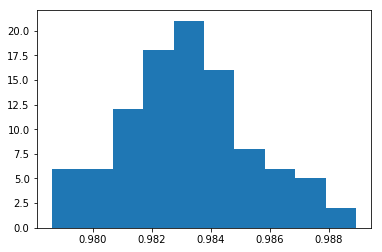

95.0 confidence interval 97.9% and 98.8%


In [101]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [97]:
from sklearn.ensemble import GradientBoostingClassifier



In [98]:
data=pd.concat([x,y],axis=1)

from sklearn.utils import resample
import numpy as np

values = data.values
n_iterations = 100              
n_size = int(len(values) *  0.5)
stats = list()

for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = GradientBoostingClassifier(n_estimators = 50, random_state=42)
    model.fit(train[:,:-1], train[:,-1])
    score = model.score(test[:,:-1], test[:,-1])  
    print(score)
    stats.append(score)

0.9830625648116142
0.986986301369863
0.9834082267542343
0.9865238424326193
0.9841379310344828
0.9820627802690582
0.9864158829676071
0.98125
0.9826825127334465
0.9859829059829059
0.9844987943506717
0.9848589125946318
0.9838376891334251
0.9822855158040986
0.9842681258549931
0.9827407663099759
0.9850590687977763
0.9855322080606269
0.9843423799582464
0.9827942188575362
0.9835953520164047
0.9835447377442578
0.982806052269601
0.9834082267542343
0.9811643835616438
0.982692973347179
0.9866071428571429
0.9855222337125129
0.9810540819841543
0.984472049689441
0.984251968503937
0.9865563598759048
0.9829387186629527
0.98559670781893
0.9832985386221295
0.9819605173587475
0.9815716272600834
0.9831209094040647
0.9855917667238422
0.984916009598903
0.9813921433494142
0.9848066298342542
0.9815888169110126
0.9840609840609841
0.9831267217630854
0.9861878453038674
0.9853242320819112
0.9767123287671233
0.9865191842378154
0.983196159122085
0.9848380427291523
0.9836009566108643
0.9827823691460055
0.98569482288

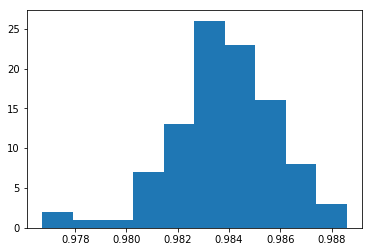

95.0 confidence interval 97.9% and 98.7%


In [99]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Gradient Boosting is performing much better than radom forest with an accuraccy of 97.9% to 98.7%